In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sb

In [29]:
def get_cosine(v1,v2):
    a=v1.dot(v2)
    b=np.sqrt(v1.dot(v1)*v2.dot(v2))
    return a/b
    pass
v_perfect=np.array([0,1,1,1,1,1])+1

In [30]:
data=np.loadtxt('data.txt')
M=len(data)
N=len(data[0])
data=data.T
dat=np.zeros([N,M])
for i in range(N):
    tmp=data[i]
    tmp=(tmp-tmp.min())/(tmp.max()-tmp.min())+1
    dat[i]=tmp
    pass
dat=dat.T
cosine=np.zeros(M)
for j in range(M):
    v=dat[j]
    cosine[j]=get_cosine(v_perfect,v)
    pass
print(cosine)

[0.97995789 0.98231776 0.94462112 0.94732701 0.9580096  0.94799996
 0.95136934 0.93339539]


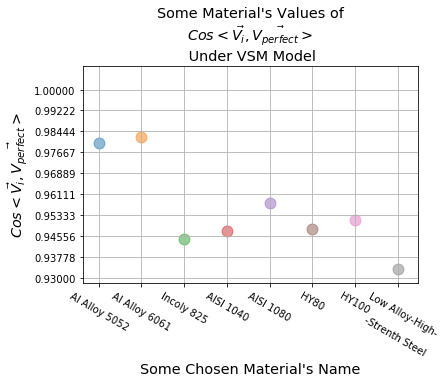

In [31]:
Id=np.array(range(M))
name=['Al Alloy 5052','Al Alloy 6061','Incoly 825','AISI 1040','AISI 1080','HY80','HY100','Low Alloy-High-\n\n  -Strenth Steel']
for i in range(M):
    plt.scatter(Id[i],cosine[i],s=120,alpha=0.5)
    pass
plt.grid(True)
plt.xticks(range(M),name,rotation=-30)
plt.yticks(np.linspace(0.93,1,10))
plt.xlabel("Some Chosen Material's Name",fontsize='x-large')
plt.ylabel(r'$Cos<\vec{V_i},\vec{V_{perfect}}>$',fontsize='x-large')
plt.title("Some Material's Values of\n"+r"$Cos<\vec{V_i},\vec{V_{perfect}}>$"+'\n Under VSM Model',fontsize='x-large')
plt.savefig('VSM.png',format='png')
plt.show()

In [32]:
print(dat)

[[1.         1.         1.         1.         1.         1.        ]
 [1.00507614 1.         1.08108108 1.04605263 1.2247191  1.02608696]
 [2.         1.9        1.08108108 1.36184211 2.         2.        ]
 [1.94416244 1.5        1.4954955  1.49342105 1.35955056 1.34782609]
 [1.94416244 2.         2.         2.         1.35955056 1.34782609]
 [1.94923858 2.         1.53153153 1.42763158 1.3258427  1.40869565]
 [1.94923858 2.         1.64414414 1.5        1.3258427  1.40869565]
 [1.94416244 2.         1.17117117 1.21052632 1.39325843 1.40869565]]


In [36]:
final=np.c_[dat,cosine]
final=np.around(final,decimals=3)
np.savetxt('VSM.txt',final)